In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
churn_df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [6]:
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_df.shape

(10000, 12)

In [8]:
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
churn_df.drop('customer_id', axis=1, inplace=True)

In [10]:
churn_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
churn_df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
tenure_yes = churn_df[churn_df.churn==1].tenure

In [13]:
tenure_no = churn_df[churn_df.churn==0].tenure

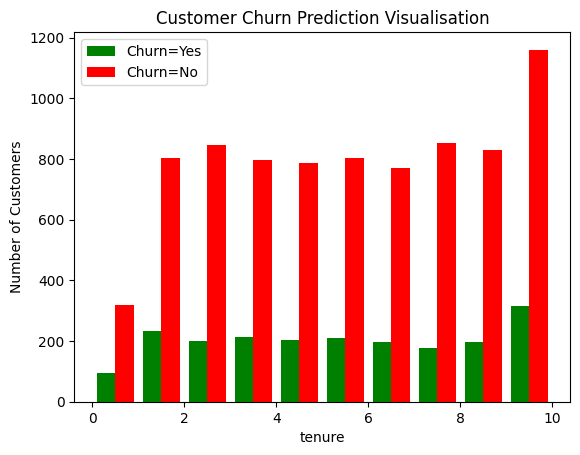

In [14]:
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.hist([tenure_yes, tenure_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

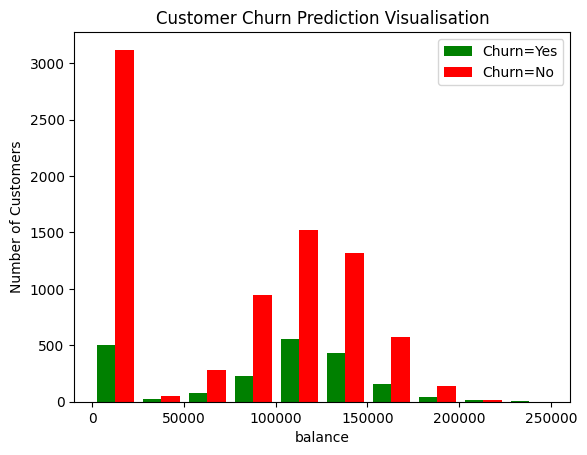

In [15]:
balance_yes = churn_df[churn_df.churn==1].balance
balance_no = churn_df[churn_df.churn==0].balance

plt.xlabel('balance')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.hist([balance_yes, balance_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

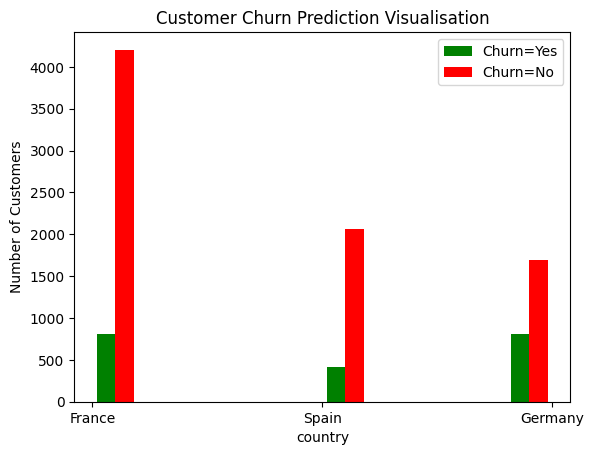

In [16]:
country_yes = churn_df[churn_df.churn==1].country
country_no = churn_df[churn_df.churn==0].country

plt.xlabel('country')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.hist([country_yes, country_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [29]:
df = pd.DataFrame(churn_df)
one_hot = pd.get_dummies(df['country'], prefix='country')
one_hot = one_hot.astype(int)

In [30]:
one_hot.head()

,country_France,country_Germany,country_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [31]:
df = pd.concat([df, one_hot], axis=1)

In [32]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [33]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [34]:
df.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [35]:
df.drop('country', axis=1, inplace=True)

In [36]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [38]:
df.shape


(10000, 13)

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(12,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 529.7798 - accuracy: 0.6407
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 74.2497 - accuracy: 0.6697
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 69.1952 - accuracy: 0.6766
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 67.2202 - accuracy: 0.6827
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 71.1141 - accuracy: 0.6827
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 55.2184 - accuracy: 0.6745
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 59.2279 - accuracy: 0.6804
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 51.4513 - accuracy: 0.6787
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 61.4003 - accuracy: 0.6873
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 55.45

In [77]:
y_p = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [78]:
y_p.shape

(2000, 1)

In [79]:
y_p

array([[0.20374283],
       [0.20374283],
       [0.20374283],
       ...,
       [0.20374283],
       [0.20374283],
       [0.20374283]], dtype=float32)

In [80]:
y_p = y_p.reshape(-1)
y_p

array([0.20374283, 0.20374283, 0.20374283, ..., 0.20374283, 0.20374283,
       0.20374283], dtype=float32)

In [81]:
np.unique(y_p)

array([0.0598992 , 0.06598636, 0.07828959, 0.08603057, 0.09440332,
       0.10321622, 0.11234993, 0.11756773, 0.12160211, 0.1504675 ,
       0.15299171, 0.16804068, 0.16897582, 0.16994148, 0.1706433 ,
       0.17251061, 0.17263125, 0.20374283], dtype=float32)

In [82]:
for i in range(len(y_p)):
  if y_p[i] > np.mean(y_p):
    y_p[i] = 1
  else:
    y_p[i] = 0

In [83]:
np.unique(y_p)

array([0., 1.], dtype=float32)

In [84]:
y_p[:10]

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)

In [87]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: churn, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

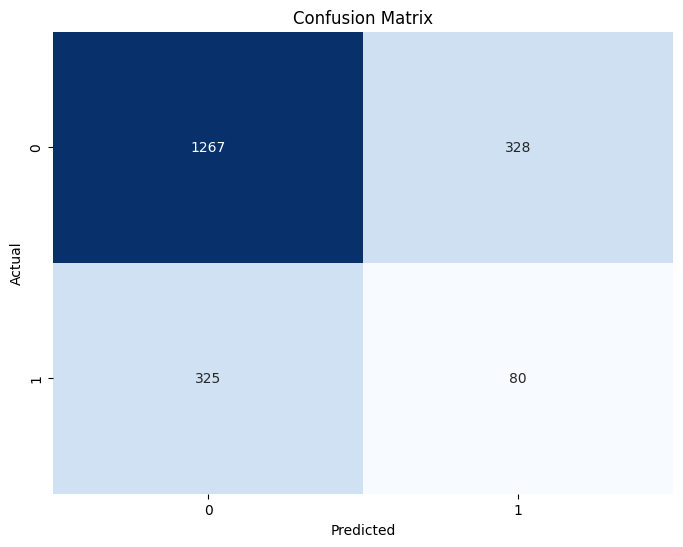

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_p)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show